# Euler mejorado

## Iniciar paquetes del programa
Usamos la biblioteca **pandas** para mostrar resultados en tablas.

Usamos **matplotlib** para mostrar funcion en grafico.

**Numpy** para guardar los arreglos numericos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Definir función diferencial
Definimos las operaciones de la función diferencial en cuestión.

Por defecto está puesta la función 2x, que es derivada de x^2.

In [2]:
def funcion(x:float):
    return 2*x

## Asignar valores iniciales
Asignamos el valor de h (diferencial de x), y valores iniciales de x e y.

También hay que asignar la cantidad de iteraciones que queremos.

In [9]:
# Iteraciones:
i = 5

# Diferencial de x
h = .5

# X e Y iniciales:
x0 = 0
y0 = 0

## Ejecución del algoritmo

In [10]:
# Definimos yi (yi-1 segun la notacion) para la funcion general
y0 = funcion(x0)


# --------------------------------------------------------------


# Listas para utilizar en dataframe y grafico

# La lista xi contiene todos los xi a usar, desde antes de comenzar a iterar
# Los obtenemos a partir del metodo arange de numpy
xi = np.arange(x0,x0 + i*h,h)

# MUCHO CUIDADO: creamos un np array "empty", que en realidad contiene numeros aleatorios
# Hay que asegurarse de sobreescribir todos durante la iteracion
lista_y = np.empty(i)
# Este metodo redondea sus valores a 2 decimales
np.around(lista_y,2)
# Lo hacemos tambien con xi por un error
np.around(xi,2)

# Error aproximado
error = np.zeros(i)


# ---------------------------------------------------------------------


# Iteracion

for n in range(i):
    
    # Usamos la funcion general
    if n == 0:
        # Operamos con la formula de euler tradicional
        lista_y[n] = y0 + h * funcion(xi[n])
    else:
        # Operamos con la formula de euler mejorado
        lista_y[n] = lista_y[n-1] + h * (funcion(xi[n]) + funcion(xi[n-1])) / 2

        # Asignamos el error aproximado
        error[n] = 100 * (lista_y[n] - lista_y[n-1]) / lista_y[n]   
      
    # Reasignamos el proximo valor yi (o yi-1 segun la notacion)

np.around(error,2)

# Inicializamos el dataframe que llenaremos con datos de la iteracion
df = pd.DataFrame({
    'x': xi,
    'y': lista_y,
    'error aprox': error
})

# Mostramos resultado
print(df)

     x     y  error aprox
0  0.0  0.00     0.000000
1  0.5  0.25   100.000000
2  1.0  1.00    75.000000
3  1.5  2.25    55.555556
4  2.0  4.00    43.750000


## Mostramos gráfico
Simplemente ejecutar el codigo para ver gráficamente el resultado

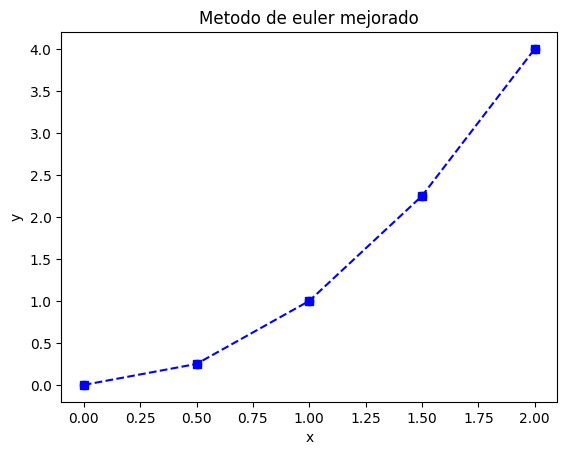

In [13]:
plt.title('Metodo de euler mejorado')
plt.xlabel('x')
plt.ylabel('y')

## Puntos
plt.scatter(xi,lista_y)
# Union de los puntos
plt.plot(xi,lista_y,'s--b')